In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from collections import Counter

In [2]:
df = pd.read_csv('../data/star_classification_10.csv', index_col='obj_ID')
rem_cols = ['run_ID', 'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'MJD', 'fiber_ID', 'plate']
df.drop(columns=rem_cols, inplace=True)
df.head()

,alpha,delta,u,g,r,i,z,class,redshift
obj_ID,,,,,,,,,
1.237663e+18,15.342907,0.794882,18.74547,17.49025,16.89122,16.57350,16.29910,GALAXY,0.042002
1.237664e+18,120.365538,55.660432,19.99985,19.68133,19.50156,19.17364,19.16122,QSO,1.633797
1.237655e+18,245.610038,42.974786,23.11792,20.81292,18.88351,18.12335,17.68182,GALAXY,0.454852
1.237660e+18,127.957356,6.647703,21.94454,21.01012,20.93496,20.93184,20.56855,QSO,2.608515
1.237665e+18,159.174526,35.881846,18.89945,17.68422,17.02925,16.60000,16.36798,GALAXY,0.083804


In [3]:
df.shape

(10000, 9)

### Tipo de corpo celeste e suas cores

Esta seção trata sobre a questão de se cada tipo de corpo celeste é caracterizado somente por uma única faixa de cor predominante ou uma combinação delas. Esse problema vai ser investigado através da análise das distribuições das variáveis que contém os valores das cores captadas pelos dispositivos.

In [4]:
stars = df[df['class'] == 'STAR']
galaxies = df[df['class'] == 'GALAXY']
quasars = df[df['class'] == 'QSO']

In [5]:
colors = ['u', 'g', 'r', 'i', 'z'] # variáveis que armazenam as cores

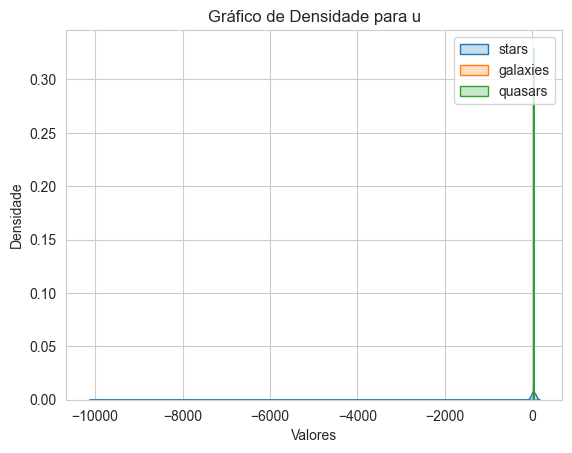

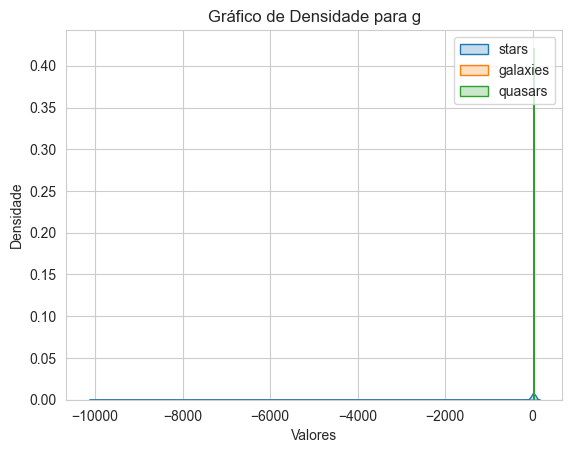

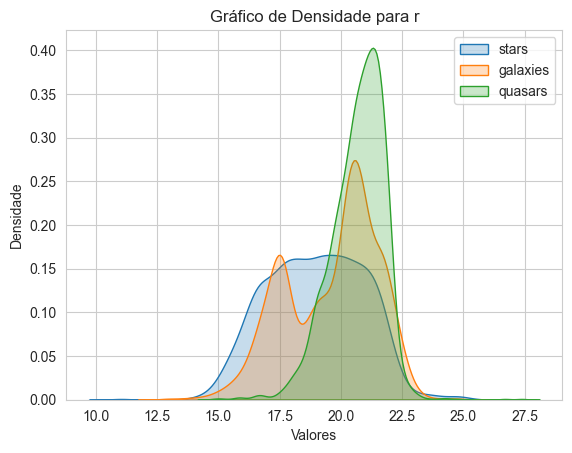

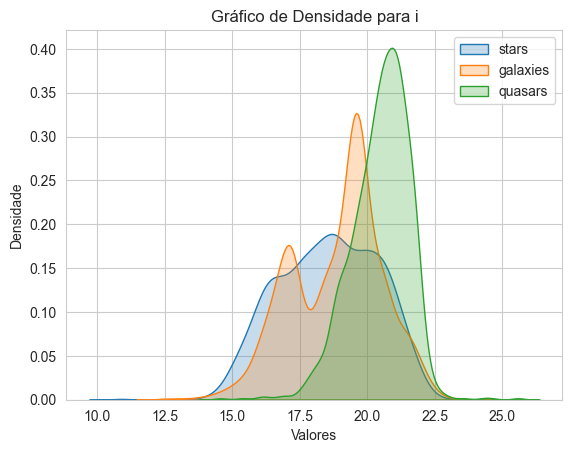

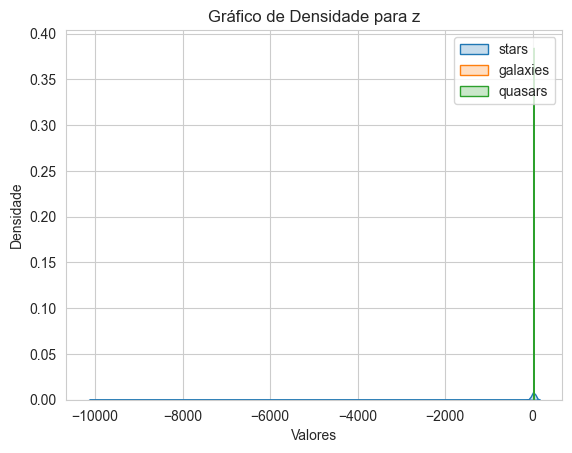

In [6]:
for color in colors:

    # Gerando dados de três distribuições diferentes
    data1 = stars[color]
    data2 = galaxies[color]
    data3 = quasars[color]

    # Configurando o estilo do gráfico
    sns.set_style('whitegrid')

    # Plotando os gráficos de densidade
    sns.kdeplot(data1, fill=True, label='stars')
    sns.kdeplot(data2, fill=True, label='galaxies')
    sns.kdeplot(data3, fill=True, label='quasars')

    # Adicionando legendas e rótulos
    plt.title('Gráfico de Densidade para ' + color)
    plt.xlabel('Valores')
    plt.ylabel('Densidade')
    plt.legend()

    # Exibindo o gráfico
    plt.show()

Algumas das distribuições acima ficaram com suas visualizações distorcidas. Levanta-se a hipóte-se de que isso se deve à presença de outliers nas variáveis analisadas. Sendo assim, vamos averiguar a existência de outliers através da normalização Z-score, caracterizada por medir quantos desvios padrão um ponto de dados está longe da média. Valores com Z-score acima do valor 3, um valor arbitrário escolhido, isto é, que se afastam a uma distância maior do que 3 desvios padrão da média serão considerados outliers.

Entretanto, iremos analisar também quantos dados serão considerados outliers, e à qual classe eles pertencem, uma vez que removê-los cegamente pode levar a um viés no conjunto de dados.

In [7]:
removed_classes = []

for color in colors:

    outliers = None

    # Calculando o Z-score
    z_scores = zscore(df[color])

    # Definindo um limite para considerar outliers (por exemplo, Z-score maior que 3)
    outliers = df[(z_scores > 3) | (z_scores < -3)]

    for index, row in outliers.iterrows():
        removed_classes.append(row['class'])

In [8]:
contagem = Counter(removed_classes)

print(contagem)

Counter({'GALAXY': 32, 'STAR': 9, 'QSO': 5})


In [9]:
contagem['GALAXY']

32

In [10]:
perc_galaxies_rem = round(contagem['GALAXY'] / galaxies.shape[0] * 100, 2)
perc_stars_rem = round(contagem['STAR'] / stars.shape[0] * 100, 2)
perc_quasars_rem = round(contagem['QSO'] / quasars.shape[0] * 100, 2)

In [11]:
print(f'Proporção de outliers de galáxias que seriam removidos: {perc_galaxies_rem}%')
print(f'Proporção de outliers de estrelas que seriam removidos: {perc_stars_rem}%')
print(f'Proporção de outliers de quasares que seriam removidos: {perc_quasars_rem}%')

Proporção de outliers de galáxias que seriam removidos: 0.54%
Proporção de outliers de estrelas que seriam removidos: 0.42%
Proporção de outliers de quasares que seriam removidos: 0.27%


Como a proporção de outliers para todas as classes é no máximo 0.54%, portanto optaremos por removê-los a fim de melhorar a visualização das distribuições.

In [12]:
for color in colors:

    outliers = None

    # Calculando o Z-score
    z_scores = zscore(df[color])

    # Definindo um limite para considerar outliers (por exemplo, Z-score maior que 3)
    outliers = df[(z_scores > 3) | (z_scores < -3)]

    rem_index = outliers.index

    df.drop(rem_index, axis=0, inplace=True)

In [13]:
# Atualização dos subconjuntos
stars = df[df['class'] == 'STAR']
galaxies = df[df['class'] == 'GALAXY']
quasars = df[df['class'] == 'QSO']

Agora iremos averiguar se a visualização das distribuições ficou melhor.

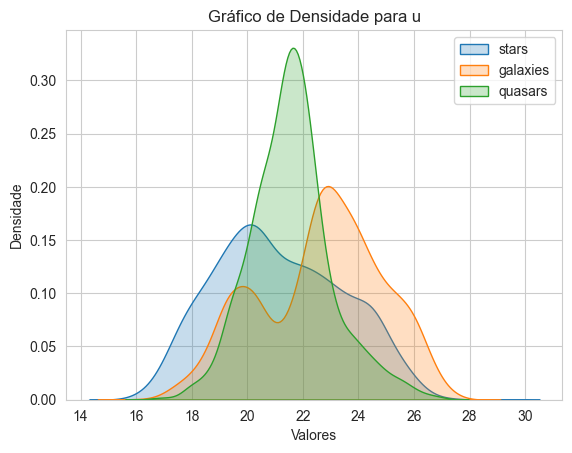

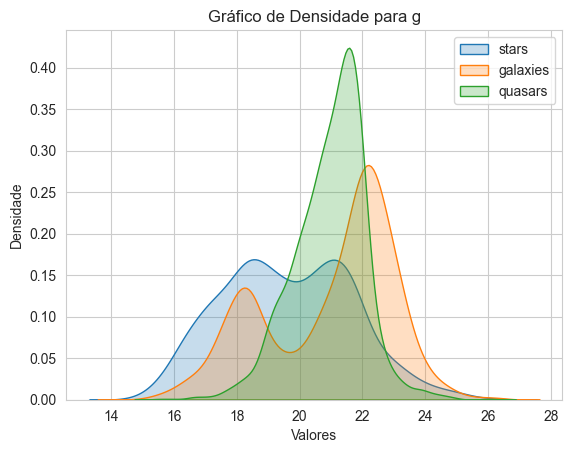

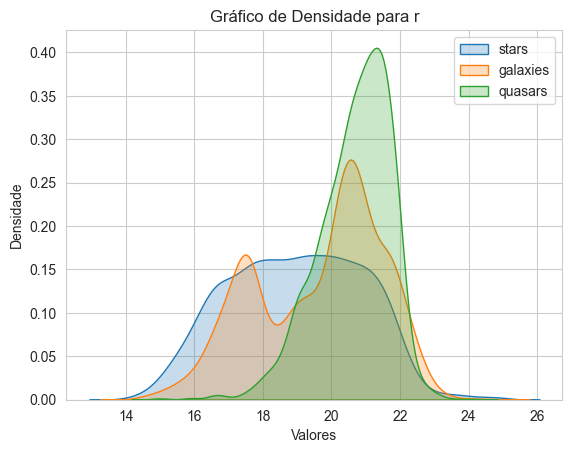

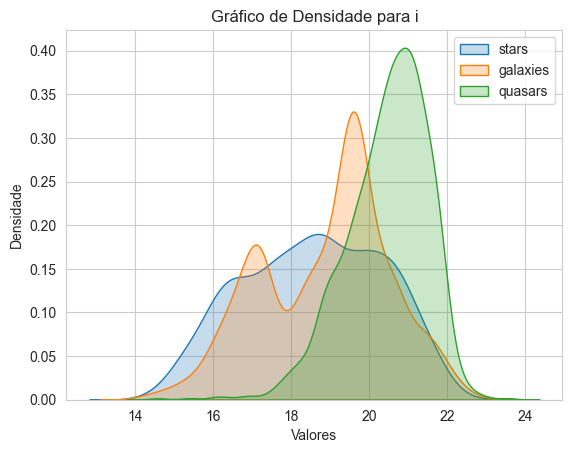

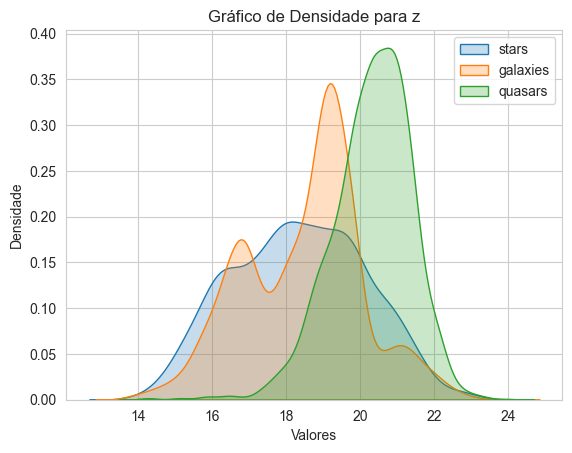

In [14]:
for color in colors:

    # Gerando dados de três distribuições diferentes
    data1 = stars[color]
    data2 = galaxies[color]
    data3 = quasars[color]

    # Configurando o estilo do gráfico
    sns.set_style('whitegrid')

    # Plotando os gráficos de densidade
    sns.kdeplot(data1, fill=True, label='stars')
    sns.kdeplot(data2, fill=True, label='galaxies')
    sns.kdeplot(data3, fill=True, label='quasars')

    # Adicionando legendas e rótulos
    plt.title('Gráfico de Densidade para ' + color)
    plt.xlabel('Valores')
    plt.ylabel('Densidade')
    plt.legend()

    # Exibindo o gráfico
    plt.show()

Nossa hipótese estava correta, pois ao retirarmos os outliers, as distribuições agora podem ser facilmente analisadas.

Podemos observar que nenhum tipo de corpo celeste possui ausência de alguma cor, indicando que nenhuma classe é exclusivamente associada a uma única cor. Em vez disso, cada tipo de corpo celeste é identificado por uma combinação de cores. Além disso, ao examinar as distribuições de valores das cores, percebemos que, para qualquer cor específica, a distribuição difere significativamente entre as diferentes classes estelares. Embora possa haver sobreposições consideráveis em algumas cores, uma análise conjunta de todas as cores facilita a distinção entre as classes. Essa clara diferenciação oferece uma vantagem importante para o modelo de aprendizado de máquina na identificação de padrões e, consequentemente, na realização de previsões com maior precisão.

Desconsiderar o que há abaixo:

In [15]:
df.describe()

,alpha,delta,u,g,r,i,z,redshift
count,9955.000000,9955.000000,9955.000000,9955.000000,9955.000000,9955.000000,9955.000000,9955.000000
mean,178.091780,23.778373,22.101106,20.665695,19.675526,19.107534,18.793087,0.578421
std,97.232354,19.562666,2.219548,2.014075,1.830355,1.726832,1.739702,0.730155
min,0.011684,-16.450911,15.787940,14.641850,14.177220,13.959800,13.699700,-0.004136
25%,127.321627,4.761258,20.371795,19.017350,18.209895,17.796530,17.527930,0.059807
50%,180.968749,22.949856,22.206610,21.132860,20.140590,19.423870,19.015780,0.436044
75%,234.317371,39.857559,23.708765,22.134725,21.068960,20.409765,19.930145,0.711451
max,359.978910,82.567500,29.040680,26.545190,24.829630,23.655340,24.000870,7.011103


In [16]:
from scipy import stats
import numpy as np

# Dados das duas distribuições
#stars['u'] = np.random.normal(loc=0, scale=1, size=100)
#galaxies['u'] = np.random.normal(loc=0.5, scale=1, size=100)

# Teste t de Student
statistic, p_value = stats.ttest_ind(stars['u'], galaxies['u'])

# Imprimir resultados
print("Estatística do teste t:", statistic)
print("Valor p:", p_value)

# Comparação com o nível de significância (ex: 0.05)
alpha = 0.05
if p_value < alpha:
    print("Rejeita-se a hipótese nula: as médias são estatisticamente diferentes")
else:
    print("Não se rejeita a hipótese nula: as médias são estatisticamente iguais")

Estatística do teste t: -25.797132590938517
Valor p: 4.4029798999876736e-141
Rejeita-se a hipótese nula: as médias são estatisticamente diferentes


In [17]:
from scipy import stats
import numpy as np

# Dados das duas distribuições
dados_dist1 = np.random.normal(loc=0, scale=1, size=100)
dados_dist2 = np.random.normal(loc=0.5, scale=1, size=100)

# Teste de Kolmogorov-Smirnov
statistic, p_value = stats.ks_2samp(stars['u'], galaxies['u'])

# Imprimir resultados
print("Estatística do teste de Kolmogorov-Smirnov:", statistic)
print("Valor p:", p_value)

# Comparação com o nível de significância (ex: 0.05)
alpha = 0.05
if p_value < alpha:
    print("Rejeita-se a hipótese nula: as distribuições são estatisticamente diferentes")
else:
    print("Não se rejeita a hipótese nula: as distribuições são estatisticamente iguais")


Estatística do teste de Kolmogorov-Smirnov: 0.3047096284283739
Valor p: 3.8063751577618604e-129
Rejeita-se a hipótese nula: as distribuições são estatisticamente diferentes


In [18]:
stars.describe()[lights]

NameError: name 'lights' is not defined

In [ ]:
galaxies.describe()[lights]

,u,g,r,i,z
count,5948.000000,5948.000000,5948.000000,5948.000000,5948.000000
mean,22.611438,20.947761,19.623354,18.880140,18.478369
std,2.235854,2.084915,1.850748,1.658855,1.627407
min,15.789190,14.668200,14.221210,13.959800,13.699700
25%,20.862720,18.992655,17.856977,17.401933,17.120627
50%,22.855360,21.617950,20.141655,19.260890,18.805145
75%,24.204775,22.465117,20.993652,19.951258,19.481220
max,27.934640,26.545190,24.813320,23.261310,24.000870


In [ ]:
quasars.describe()[lights]

,u,g,r,i,z
count,1878.000000,1878.000000,1878.000000,1878.000000,1878.000000
mean,21.569451,20.959794,20.661357,20.458793,20.305503
std,1.470842,1.137159,1.061785,1.057264,1.084088
min,16.570940,15.493780,14.868540,14.468270,14.193600
25%,20.642738,20.253383,20.029287,19.825845,19.684197
50%,21.531830,21.131675,20.833580,20.606035,20.408115
75%,22.314645,21.720255,21.444617,21.220288,21.052340
max,26.991750,26.140170,24.154610,23.655340,23.990340
